In [35]:
# Import necessary plot libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Function for plotting decision bounds
from mlxtend.plotting import plot_decision_regions

# Set seaborn theme
sns.set_theme()

# Read iris dataset into DataFrame
df = pd.read_csv("Datasets/iris_dataset.csv")

In [36]:
df.iloc[:100]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor


In [37]:
# Store setosa values in numpy array 'y'
y = df.iloc[0:100].species.values

# Convert each entry of y with setosa to -1 and o.w. 1
y = np.where(y == 'setosa', -1, 1)

# Store desired feature measurements in matrix 'X'
X = df[["sepal_length", "sepal_width"]].iloc[0:100].values


In [38]:
# Perceptron Class
class Perceptron(object):
    def __init__(self, eta = .5, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):
        self.w_ = np.random.rand(1 + X.shape[1])

        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update*xi
                self.w_[-1] -= update
                errors += int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors_.append(errors)

        return self

    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [39]:
# instantiate one instance of the Perceptron class
clf = Perceptron(epochs = 100_000)

# call train method to traint weights and bias of given instance
clf.train(X, y)

In [40]:
# Predict labels on features in X for setosa
y_hat = clf.predict(X)

# Compare y_hat and y
print(y == y_hat)


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


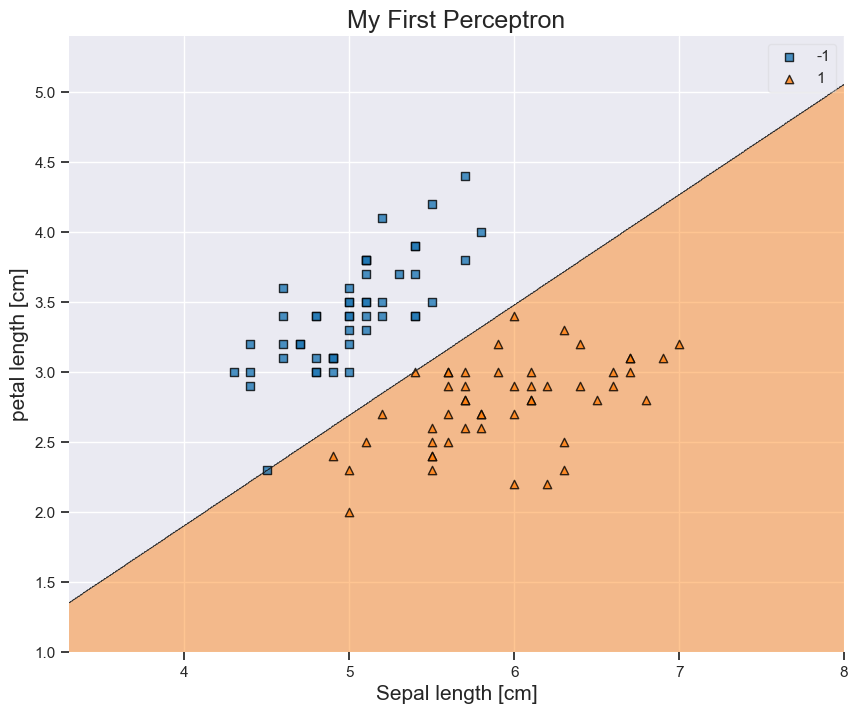

In [41]:
# Plot visualization for setosa data
plt.figure(figsize=(10, 8))
plot_decision_regions(X, y, clf= clf)
plt.title("My First Perceptron", fontsize = 18)
plt.xlabel('Sepal length [cm]', fontsize = 15)
plt.ylabel('petal length [cm]', fontsize = 15)
plt.show()

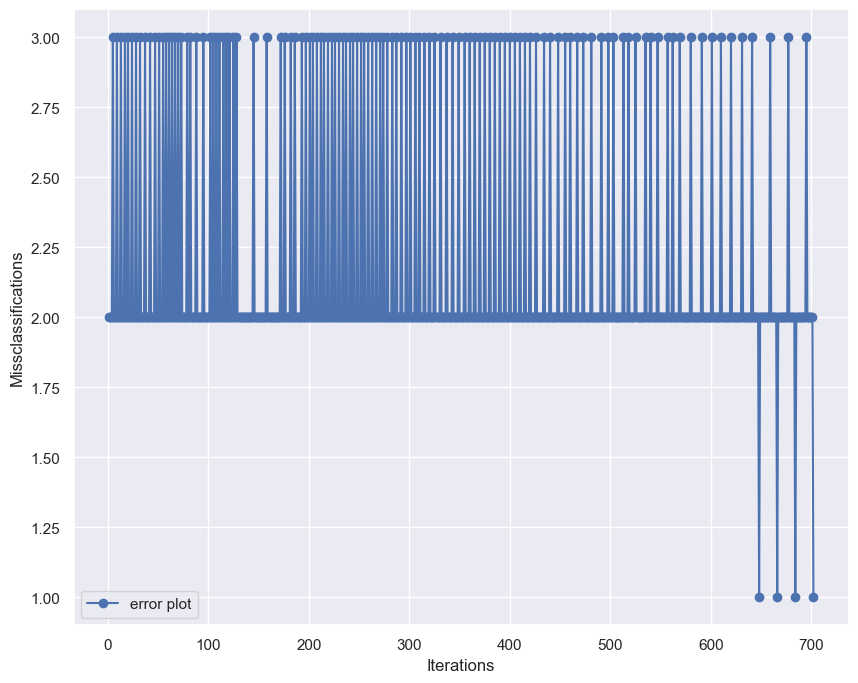

In [42]:
# Plot setosa errors

plt.figure(figsize = (10, 8))
plt.plot(range(1, len(clf.errors_)+1), clf.errors_,
         marker = "o",
         label = "error plot",)
plt.xlabel("Iterations")
plt.ylabel("Missclassifications")
plt.legend()
plt.show()

In [50]:

# Convert each entry of y with versicolor to -1 and o.w. 1
y = np.where(y == 'versicolor', -1, 1)

# Store desired feature measurements in matrix 'X'
X = df[["sepal_length", "sepal_width"]].iloc[0:100].values

# call train method to traint weights and bias of given instance
clf.train(X, y)

In [51]:
# Predict labels on features in X for versicolor
y_hat = clf.predict(X)

# Compare y_hat and y
print(y == y_hat)


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


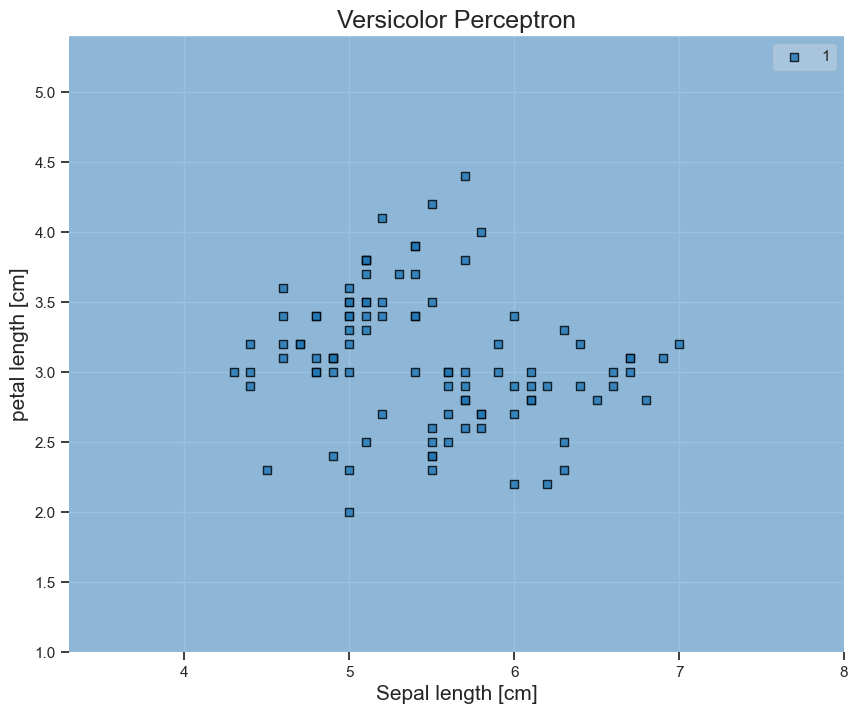

In [52]:
# Plot visualization for versicolor data
plt.figure(figsize=(10, 8))
plot_decision_regions(X, y, clf= clf)
plt.title("Versicolor Perceptron", fontsize = 18)
plt.xlabel('Sepal length [cm]', fontsize = 15)
plt.ylabel('petal length [cm]', fontsize = 15)
plt.show()

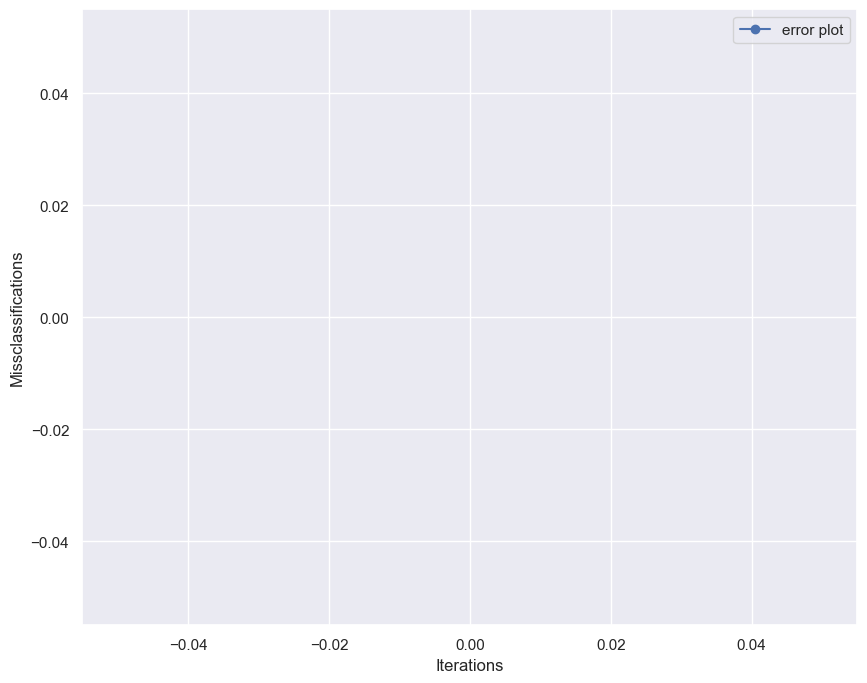

In [53]:
# Plot versicolor errors

plt.figure(figsize = (10, 8))
plt.plot(range(1, len(clf.errors_)+1), clf.errors_,
         marker = "o",
         label = "error plot",)
plt.xlabel("Iterations")
plt.ylabel("Missclassifications")
plt.legend()
plt.show()

In [47]:
# Convert each entry of y with virginica to -1 and o.w. 1
y = np.where(y == 'virginica', -1, 1)

# Store desired feature measurements in matrix 'X'
X = df[["sepal_length", "sepal_width"]].iloc[0:100].values

# call train method to traint weights and bias of given instance
clf.train(X, y)

In [48]:
# Predict labels on features in X for virginica
y_hat = clf.predict(X)

# Compare y_hat and y
print(y == y_hat)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


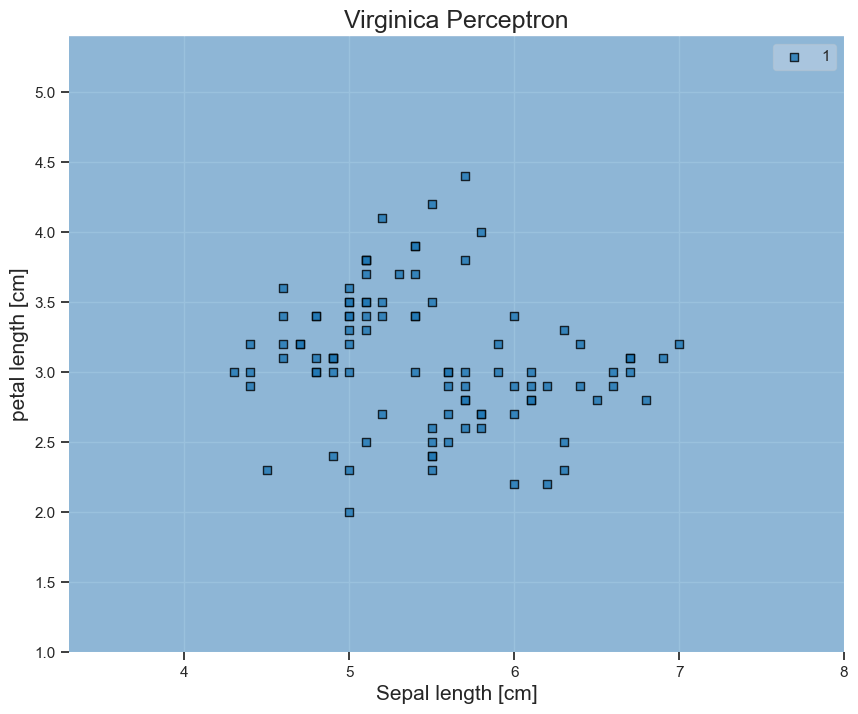

In [49]:
# Plot visualization for virginica data
plt.figure(figsize=(10, 8))
plot_decision_regions(X, y, clf= clf)
plt.title("Virginica Perceptron", fontsize = 18)
plt.xlabel('Sepal length [cm]', fontsize = 15)
plt.ylabel('petal length [cm]', fontsize = 15)
plt.show()

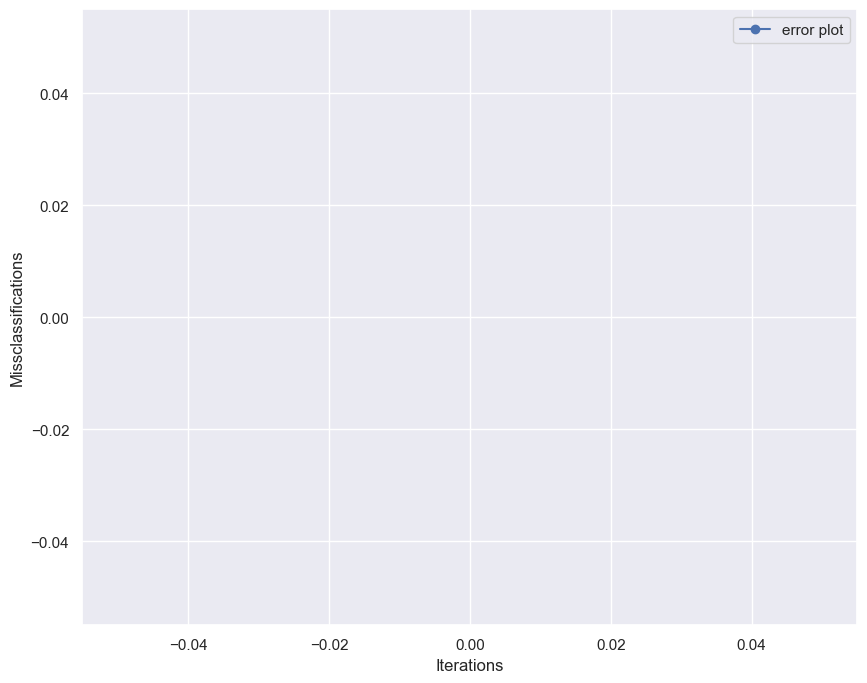

In [54]:
# Plot virginica errors

plt.figure(figsize = (10, 8))
plt.plot(range(1, len(clf.errors_)+1), clf.errors_,
         marker = "o",
         label = "error plot",)
plt.xlabel("Iterations")
plt.ylabel("Missclassifications")
plt.legend()
plt.show()